In [1]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data Collection

In [55]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Salary_Hike/main/salary_hike.csv'
data = pd.read_csv(path)
original_data = data.copy()
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Data Preparation

In [56]:
data.shape

(30, 2)

This means that this dataset has 30 rows and 2 columns.

In [57]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


There are no null/missing values in the data.

<Axes: xlabel='YearsExperience', ylabel='Density'>

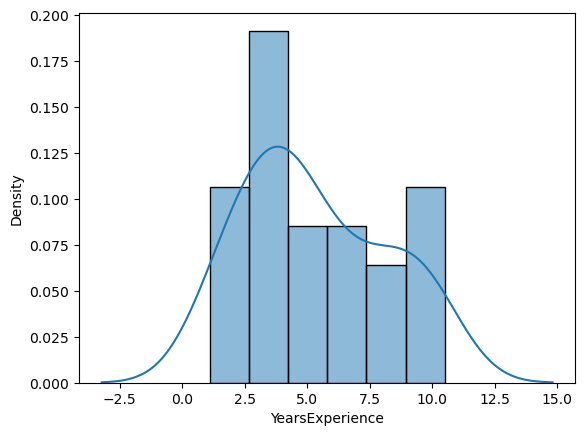

In [59]:
sns.histplot(x = data['YearsExperience'],stat = 'density',kde = True,kde_kws=dict(cut=3))

<Axes: xlabel='Salary', ylabel='Density'>

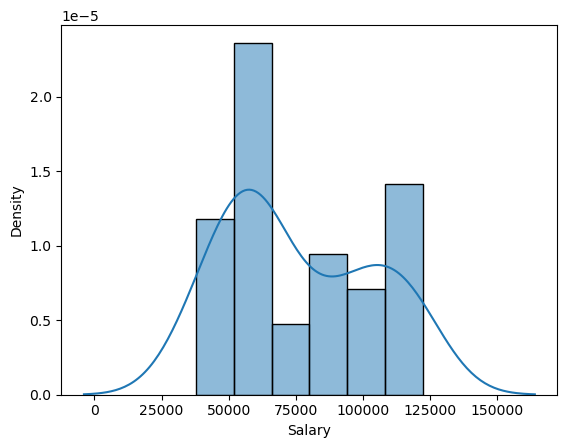

In [60]:
sns.histplot(x = data['Salary'],stat = 'density',kde = True,kde_kws=dict(cut=3))

<Axes: xlabel='YearsExperience'>

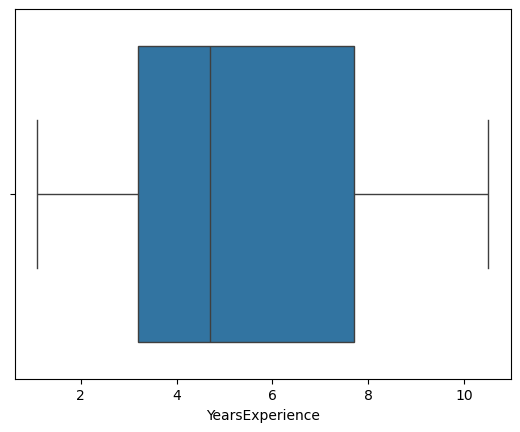

In [61]:
sns.boxplot(x = 'YearsExperience', data = data)

<Axes: xlabel='Salary'>

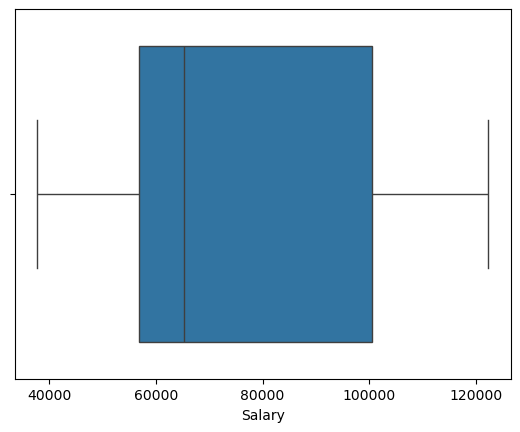

In [62]:
sns.boxplot(x = 'Salary', data = data)

There are no outliers in the data.

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


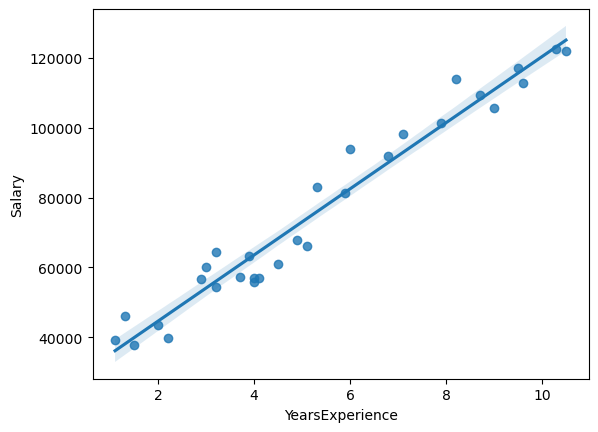

In [63]:
sns.regplot(x = 'YearsExperience',y = 'Salary',data = data)
data.corr()

We can see that there is a very high positive correlation between both the variables.

In [64]:
X = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 1234) 

### Model Selection - Simple Linear Regression

### Model building and Training

In [65]:
lr = LinearRegression()
lr_fit = lr.fit(X_train,y_train)
lr_fit

LinearRegression()

### Model Evaluation

In [66]:
y_pred_train = lr_fit.predict(X_train)

print('Training Accuracy is',round(r2_score(y_train,y_pred_train),2))

Training Accuracy is 0.96


In [67]:
y_pred_test = lr_fit.predict(X_test)

print('Testing Accuracy is',round(r2_score(y_test,y_pred_test),2))

Testing Accuracy is 0.95


Training Accuracy is close to Testing Accuracy which means it is a Generalized Model and the accuracy is quite high which means it is good model.